# Dunham's Data

## Setting up

In [1]:
import math

import pandas as pd
import seaborn as sns

In [2]:
# pd.set_option('display.max_rows', 999)

In [3]:
# sns.set()

In [4]:
# %matplotlib inline

## Loading data

In [5]:
itinerary_df = pd.read_csv('data/out/itinerary_1947-60.csv')
itinerary_df.fillna('', inplace=True)

In [6]:
itinerary_df.shape

(5, 10)

In [7]:
itinerary_df

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE
0,1947-03-14,1947-04-07,New York City,USA,2,Probably that night,1,2,40.712700,-74.005900
1,1947-06-28,1947-09-01,Mexico City,Mexico,5,Probably that night,4,5,19.433333,-99.133333
2,1947-12-29,1947-12-29,San Diego,USA,1,Probably that night,0,1,32.715000,-117.162500
3,1948-01-02,1948-01-02,"Stockton, CA",USA,1,Probably that night,0,1,37.975556,-121.300833
4,1948-01-04,1948-01-04,San Francisco,USA,1,Probably that night,0,1,37.783333,-122.416667


## Pre-processing data

In [8]:
itinerary_df = itinerary_df[pd.to_datetime(itinerary_df.START_DATE) < '1961'].copy()
itinerary_df.tail()

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE
0,1947-03-14,1947-04-07,New York City,USA,2,Probably that night,1,2,40.712700,-74.005900
1,1947-06-28,1947-09-01,Mexico City,Mexico,5,Probably that night,4,5,19.433333,-99.133333
2,1947-12-29,1947-12-29,San Diego,USA,1,Probably that night,0,1,32.715000,-117.162500
3,1948-01-02,1948-01-02,"Stockton, CA",USA,1,Probably that night,0,1,37.975556,-121.300833
4,1948-01-04,1948-01-04,San Francisco,USA,1,Probably that night,0,1,37.783333,-122.416667


In [9]:
first_date = pd.to_datetime(itinerary_df.START_DATE.iloc[0].split('-')[0])
last_date = pd.to_datetime(itinerary_df.END_DATE.iloc[-1])
total_days = (last_date - first_date).days + 1

In [10]:
total_days

369

In [11]:
itinerary_df['GROUP'] = 0
group = 1
itinerary_df.loc[0, 'GROUP'] = group
for i, row in itinerary_df[1:].iterrows():
    prev_row = itinerary_df.loc[i-1]
    prev_row_end_date = pd.to_datetime(prev_row['END_DATE'])
    curr_row_start_date = pd.to_datetime(row['START_DATE'])
    n_days = (curr_row_start_date - prev_row_end_date).days
    if n_days == 0:
        print('ERROR')
    elif n_days <= 7:
        pass
    else: # n_days > 7
        group += 1
    itinerary_df.loc[i, 'GROUP'] = group

In [12]:
itinerary_df.head()

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE,GROUP
0,1947-03-14,1947-04-07,New York City,USA,2,Probably that night,1,2,40.712700,-74.005900,1
1,1947-06-28,1947-09-01,Mexico City,Mexico,5,Probably that night,4,5,19.433333,-99.133333,2
2,1947-12-29,1947-12-29,San Diego,USA,1,Probably that night,0,1,32.715000,-117.162500,3
3,1948-01-02,1948-01-02,"Stockton, CA",USA,1,Probably that night,0,1,37.975556,-121.300833,3
4,1948-01-04,1948-01-04,San Francisco,USA,1,Probably that night,0,1,37.783333,-122.416667,3


In [13]:
itinerary_df.tail()

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE,GROUP
0,1947-03-14,1947-04-07,New York City,USA,2,Probably that night,1,2,40.712700,-74.005900,1
1,1947-06-28,1947-09-01,Mexico City,Mexico,5,Probably that night,4,5,19.433333,-99.133333,2
2,1947-12-29,1947-12-29,San Diego,USA,1,Probably that night,0,1,32.715000,-117.162500,3
3,1948-01-02,1948-01-02,"Stockton, CA",USA,1,Probably that night,0,1,37.975556,-121.300833,3
4,1948-01-04,1948-01-04,San Francisco,USA,1,Probably that night,0,1,37.783333,-122.416667,3


In [14]:
aux_df = itinerary_df.drop_duplicates('CITY', keep='last') \
    [['CITY', 'LATITUDE', 'LONGITUDE', 'GROUP', 'END_DATE']]

In [15]:
aux_df.head()

,CITY,LATITUDE,LONGITUDE,GROUP,END_DATE
0,New York City,40.712700,-74.005900,1,1947-04-07
1,Mexico City,19.433333,-99.133333,2,1947-09-01
2,San Diego,32.715000,-117.162500,3,1947-12-29
3,"Stockton, CA",37.975556,-121.300833,3,1948-01-02
4,San Francisco,37.783333,-122.416667,3,1948-01-04


## Processing data

In [16]:
def next_year(d_str):
    return pd.to_datetime('{}-01-01'.format(int(d_str.split('-')[0]) + 1))

def altitud_year(d):
    return (d - first_date).days# + 1

In [17]:
points_df = aux_df[['LATITUDE', 'LONGITUDE', 'CITY']].copy()
# points_df['ALTITUDE'] = aux_df['END_DATE'].apply(lambda x: altitud_year(next_year(x)))
points_df['ALTITUDE'] = aux_df['END_DATE'].apply(lambda x: altitud_year(pd.to_datetime(x)))

In [18]:
points_df.shape

(5, 4)

In [19]:
points_df.head()

,LATITUDE,LONGITUDE,CITY,ALTITUDE
0,40.712700,-74.005900,New York City,96
1,19.433333,-99.133333,Mexico City,243
2,32.715000,-117.162500,San Diego,362
3,37.975556,-121.300833,"Stockton, CA",366
4,37.783333,-122.416667,San Francisco,368


In [20]:
cities_df = aux_df[['CITY', 'LATITUDE', 'LONGITUDE']].copy()
cities_df.columns = ['TEXT', 'LATITUDE', 'LONGITUDE']
cities_df['ALTITUDE'] = 0
cities_df['TYPE'] = 'city'

In [21]:
cities_df.shape

(5, 5)

In [22]:
cities_df.head()

,TEXT,LATITUDE,LONGITUDE,ALTITUDE,TYPE
0,New York City,40.712700,-74.005900,0,city
1,Mexico City,19.433333,-99.133333,0,city
2,San Diego,32.715000,-117.162500,0,city
3,"Stockton, CA",37.975556,-121.300833,0,city
4,San Francisco,37.783333,-122.416667,0,city


In [23]:
years_df = pd.DataFrame(columns=['TEXT', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'TYPE'])
for i, row in aux_df.iterrows():
    end_date = aux_df.loc[i, 'END_DATE']
    next_year_date = next_year(end_date)
#     print(aux_df.loc[i, 'CITY'], end_date)
#     print(pd.date_range(first_date, next_year_date, freq='YS'))
    for d in pd.date_range(first_date, next_year_date, freq='YS'):
        years_df.loc[len(years_df)] = [str(d.year), row['LATITUDE'], row['LONGITUDE'], altitud_year(d), 'year']

In [24]:
years_df.shape

(12, 5)

In [25]:
years_df.head(10)

,TEXT,LATITUDE,LONGITUDE,ALTITUDE,TYPE
0,1947,40.712700,-74.005900,0,year
1,1948,40.712700,-74.005900,365,year
2,1947,19.433333,-99.133333,0,year
3,1948,19.433333,-99.133333,365,year
4,1947,32.715000,-117.162500,0,year
5,1948,32.715000,-117.162500,365,year
6,1947,37.975556,-121.300833,0,year
7,1948,37.975556,-121.300833,365,year
8,1949,37.975556,-121.300833,731,year
9,1947,37.783333,-122.416667,0,year


In [26]:
labels_df = pd.concat([cities_df, years_df], ignore_index=True)

In [27]:
labels_df.shape

(17, 5)

In [28]:
def format_date(date_str):
    return pd.to_datetime(date_str).strftime('%b %d, %Y').replace(' 0', ' ')

paths_df = pd.DataFrame(columns=['LATITUDE', 'LONGITUDE', 'ALTITUDE', 'GROUP', 'CITY', 'DATE'])
for i, row in itinerary_df.iterrows():
    paths_df.loc[i*2, 'LATITUDE'] = row['LATITUDE']
    paths_df.loc[i*2, 'LONGITUDE'] = row['LONGITUDE']
    paths_df.loc[i*2, 'ALTITUDE'] =  (pd.to_datetime(row['START_DATE']) - first_date).days
    paths_df.loc[i*2, 'GROUP'] = row['GROUP']
    paths_df.loc[i*2, 'CITY'] = row['CITY']
    paths_df.loc[i*2, 'DATE'] = format_date(row['START_DATE'])
    paths_df.loc[i*2+1, 'LATITUDE'] = paths_df.loc[i*2, 'LATITUDE']
    paths_df.loc[i*2+1, 'LONGITUDE'] = paths_df.loc[i*2, 'LONGITUDE']
    paths_df.loc[i*2+1, 'ALTITUDE'] =  (pd.to_datetime(row['END_DATE']) - first_date).days
#     paths_df.loc[i*2+1, 'ALTITUDE'] =  paths_df.loc[i*2, 'ALTITUDE'] + row['MAX_NIGHTS']
    paths_df.loc[i*2+1, 'GROUP'] = paths_df.loc[i*2, 'GROUP']
    paths_df.loc[i*2+1, 'CITY'] = paths_df.loc[i*2, 'CITY']
    paths_df.loc[i*2+1, 'DATE'] = format_date(row['END_DATE'])
# paths_df['COLOR'] = paths_df['GROUP'].apply(rgb01Hex)

In [29]:
paths_df.shape

(10, 6)

In [30]:
paths_df.head()

,LATITUDE,LONGITUDE,ALTITUDE,GROUP,CITY,DATE
0,40.7127,-74.0059,72,1,New York City,"Mar 14, 1947"
1,40.7127,-74.0059,96,1,New York City,"Apr 7, 1947"
2,19.4333,-99.1333,178,2,Mexico City,"Jun 28, 1947"
3,19.4333,-99.1333,243,2,Mexico City,"Sep 1, 1947"
4,32.715,-117.162,362,3,San Diego,"Dec 29, 1947"


In [31]:
paths_df.tail()

,LATITUDE,LONGITUDE,ALTITUDE,GROUP,CITY,DATE
5,32.715,-117.162,362,3,San Diego,"Dec 29, 1947"
6,37.9756,-121.301,366,3,"Stockton, CA","Jan 2, 1948"
7,37.9756,-121.301,366,3,"Stockton, CA","Jan 2, 1948"
8,37.7833,-122.417,368,3,San Francisco,"Jan 4, 1948"
9,37.7833,-122.417,368,3,San Francisco,"Jan 4, 1948"


In [32]:
total_lines = len(paths_df) - 1

In [33]:
total_lines

9

In [34]:
N = 300

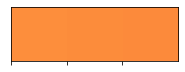

In [35]:
# Color 1
palette1 = sns.color_palette('YlOrRd', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette1)
sns.palplot([palette1[0], palette1[len(palette1)//2], palette1[-1]])

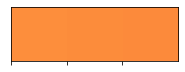

In [36]:
# Color 1R
palette1r = sns.color_palette('YlOrRd', n_colors=total_lines+N*2)[-N:N:-1]
# sns.palplot(palette1)
sns.palplot([palette1[0], palette1[len(palette1)//2], palette1[-1]])

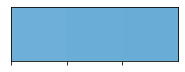

In [37]:
# Color 2
palette2 = sns.color_palette('Blues', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette2)
sns.palplot([palette2[0], palette2[len(palette2)//2], palette2[-1]])

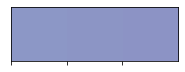

In [38]:
# Color 3
palette3 = sns.color_palette('BuPu', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette3)
sns.palplot([palette3[0], palette3[len(palette3)//2], palette3[-1]])

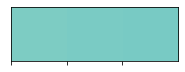

In [39]:
# Color 4
palette4 = sns.color_palette('GnBu', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette4)
sns.palplot([palette4[0], palette4[len(palette4)//2], palette4[-1]])

In [40]:
def rgb01Hex(n, palette):
    c = palette[n]
    r = int(round(c[0] * 255))
    g = int(round(c[1] * 255))
    b = int(round(c[2] * 255))
    h = '#%02x%02x%02x' % (r, g, b)
    return h

In [41]:
path_colors_df = pd.DataFrame(columns=[
    'CITY1', 'CITY2', 'HEXCODE1', 'HEXCODE1R', 'HEXCODE2', 'HEXCODE3', 'HEXCODE4',
])
prev_g = paths_df.GROUP[0]
for curr_g in paths_df.GROUP[1:]:
    i = len(path_colors_df)
    if curr_g == prev_g:
        path_colors_df.loc[i] = [
            paths_df.loc[i, 'CITY'],
            paths_df.loc[i+1, 'CITY'],
            rgb01Hex(i, palette1),
            rgb01Hex(i, palette1r),
            rgb01Hex(i, palette2),
            rgb01Hex(i, palette3),
            rgb01Hex(i, palette4),
        ]
    else:
        path_colors_df.loc[i] = [
            paths_df.loc[i, 'CITY'],
            paths_df.loc[i+1, 'CITY'],
            'grey', 'grey', 'grey', 'grey', 'grey',
        ]
    prev_g = curr_g

In [42]:
path_colors_df.shape

(9, 7)

In [43]:
path_colors_df.head()

,CITY1,CITY2,HEXCODE1,HEXCODE1R,HEXCODE2,HEXCODE3,HEXCODE4
0,New York City,New York City,#fd8f3d,#fd883b,#6dafd7,#8d98c7,#7dcdc3
1,New York City,Mexico City,grey,grey,grey,grey,grey
2,Mexico City,Mexico City,#fd8e3c,#fd8a3b,#6caed6,#8c97c6,#7cccc4
3,Mexico City,San Diego,grey,grey,grey,grey,grey
4,San Diego,San Diego,#fd8c3c,#fd8c3c,#6aaed6,#8c95c6,#7accc4


In [44]:
path_colors_df.tail()

,CITY1,CITY2,HEXCODE1,HEXCODE1R,HEXCODE2,HEXCODE3,HEXCODE4
4,San Diego,San Diego,#fd8c3c,#fd8c3c,#6aaed6,#8c95c6,#7accc4
5,San Diego,"Stockton, CA",#fd8c3c,#fd8c3c,#6aaed6,#8c95c6,#7accc4
6,"Stockton, CA","Stockton, CA",#fd8c3c,#fd8e3c,#6aaed6,#8c95c6,#7accc4
7,"Stockton, CA",San Francisco,#fd8a3b,#fd8e3c,#69add5,#8c94c5,#79cbc5
8,San Francisco,San Francisco,#fd8a3b,#fd8f3d,#69add5,#8c94c5,#79cbc5


In [45]:
# sns.palplot(path_colors_df.HEXCODE1)

In [46]:
# sns.palplot(path_colors_df.HEXCODE1R)

In [47]:
# sns.palplot(path_colors_df.HEXCODE2)

In [48]:
# sns.palplot(path_colors_df.HEXCODE3)

In [49]:
# sns.palplot(path_colors_df.HEXCODE4)

## Saving data

In [50]:
points_df.to_csv('web/data/points4760.csv', index=False)
labels_df.to_csv('web/data/labels4760.csv', index=False)
paths_df.to_csv('web/data/paths4760.csv', index=False)
path_colors_df.to_csv('web/data/path_colors4760.csv', index=False)